In [1]:
## Pre-setting
# automatically adjust the width of the notebook code cell
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# if one module is changed, this line will automatically reload that module
%load_ext autoreload
%autoreload 2

# display the figure in the notebook
%matplotlib inline

# To change the font size in acrobat
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42

In [2]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt

In [3]:
###########
## Setup ##
###########
# number of pt for column in latex-document
fig_width_pt = 510  # single-column:510, double-column: 246; Get this from LaTeX using \showthe\columnwidth
inches_per_pt = 1.1/72.27 # Convert pt to inches
width_vs_height = (np.sqrt(5)-1.0)/2.5#(np.sqrt(5)-1.0)/2.0 # Ratio of height/width [(np.sqrt(5)-1.0)/2.0]
fig_width = fig_width_pt*inches_per_pt  # width in inches
fig_height = width_vs_height*fig_width  # height in inches
fig_size = [fig_width,fig_height]

# here you can set the parameters of the plot (fontsizes,...) in pt
params = {'backend': 'ps',
          'axes.titlesize':14,
          'axes.labelsize': 10,
#           'text.fontsize': 10,
          'legend.fontsize': 6,
#           'figtext.fontsize': 12,
          'xtick.labelsize': 10,
          'ytick.labelsize': 10,
          
          'text.usetex': True,
          'ps.usedistiller' : 'xpdf',
          'figure.figsize': fig_size,
          'text.latex.unicode':True,
          'text.latex.preamble': [r'\usepackage{bm}'],
          
          'xtick.direction':'out',
          'ytick.direction':'out',
          
          'axes.spines.right' : False,
          'axes.spines.top' : False
         }
plt.rcParams.update(params)

set_b = 0.22 # set bottom
set_l = 0.1 # set left
set_r = 0.925 # set right
set_hs = 0.2 # set horizontal space
set_vs = 0.25 # set vertical space

set_ms = 0.0 # set marker size
set_lw = 1.5 # set line width
set_alpha = 0.8

/home/martin/anaconda3/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


# main

## new figures

In [4]:
# ## CORPORA
list_corpus_name = [
        't20NewsGroup_topic_doc_no_short',
        'reuters_filter_10largest_dic',
        'wos_topic_doc_delSci_withstop',
#         'multi_lg_portuguese_dw_general_v2',
#         'multi_lg_german',
#         'multi_lg_chinese_sogou',
        ]
list_corpus_label = [
    '20Newsgroups',
    'Reuters',
    'Web of Science',
    'Portuguese',
    'German',
    'Chinese'
]

In [5]:
## Filtering methods
list_method = [
'INFOR',
'TFIDF',
'MANUAL',
'BOTTOM',
'TOP',
'TOP-BOTTOM',
'RANDOM',
]

# cmap = 'tab10'
# ccolors = plt.get_cmap(cmap)(np.arange(10, dtype=int))
# list_colors = [
#     ccolors[0],
#     ccolors[1],
#     ccolors[2],
#     ccolors[3], 
#     ccolors[6], 
#     ccolors[9],
#     'black', 
# ]

list_colors = [
    plt.get_cmap('tab20c')(0),
    plt.get_cmap('tab20c')(8),
    plt.get_cmap('tab20c')(4),
    plt.get_cmap('tab20b')(11),
    plt.get_cmap('tab20b')(10),
    plt.get_cmap('tab20b')(9),
    str(0.)
    
]

list_ls = [
    '-',
    '-',
    '-',
    '-',
    '--',
    '-.',
    ':'
]

## if you want to filter only some methods for plotting
list_method_plot = list_method
# list_method_plot = [
#     'INFOR',
#     'TFIDF',
#     'MANUAL'
# ]

In [6]:
## Remaining parameters

# topic model
list_topic_model = [
    'hdp',
    'ldags',
    'ldavb'
    ]

list_observable = [
    'nmi_acc',
    'nmi_repr',
]
list_observable_label = [
    'Topic quality: \n Accuracy',
    'Topic quality: \n Reproducibility'
]

N_s = 1000
k_set = 20
n_rep = 10
arr_p = np.linspace(0.0,0.9,10)
path_data = os.path.join(os.pardir,'cluster_output','tm-run_20190620')

In [7]:
# i_tm_sel = 0
# tm_sel = list_topic_model[i_tm_sel]

# i_obs_sel = 0
# obs_sel = list_observable[i_obs_sel]



In [8]:
from itertools import product


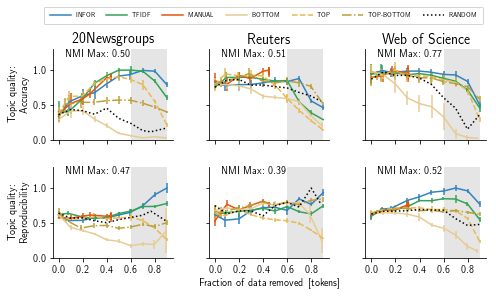

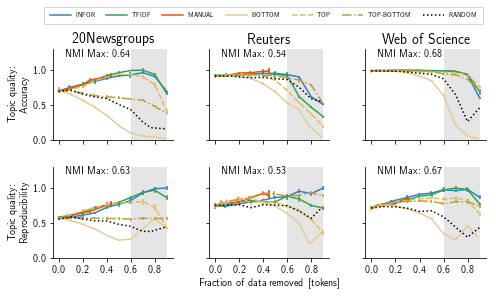

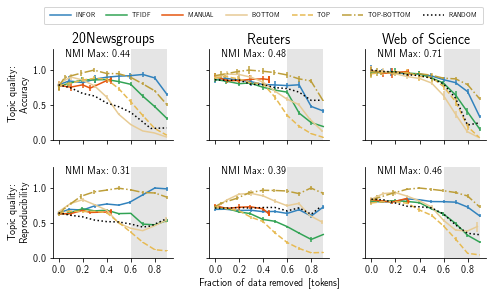

In [9]:
x_annot = -0.25
y_annot = 1.05

n_rows = 2
n_cols = 3

n_std = 2
lw = 1

ylim1,ylim2 = 0.,1.3
xlim1,xlim2 = -0.05,0.95

x_label_list = [0.0,0.2,0.4,0.6,0.8]#,1.]
y_label_list = [0.0,0.5,1.0]

i_xtick_visible = [4,5,6] ## i_plot
i_ytick_visible = [1,4] ## i_plot

i_xlabel_visible = [5]
i_ylabel_visible = [1,4]

i_title_visible = [1,2,3] ## i_plot

normalize = True ## normalize by the maximum value (y)


for tm_sel, in product(list_topic_model):

    fig = plt.figure(figsize=fig_size)
    plt.clf()
    for i_corpus_sel,corpus_sel in enumerate(list_corpus_name):

        for i_obs_sel,obs_sel in enumerate(list_observable):

            i_plot = i_corpus_sel+n_cols*i_obs_sel+1
            ax = fig.add_subplot(n_rows,n_cols,i_plot)

            ## read data for all methods
            ## iterate over all methods to get maxiumum: plot later
            dict_data = {}
            y_max = 0
            for i_method_sel,method_sel in enumerate(list_method):
                x = []
                y = []
                yerr = []
                for i_p,p in enumerate(arr_p):
                    fname = '%s_%s-%s_%s_p%.2f_Ns%s_nrep%s'%(corpus_sel,tm_sel,k_set,method_sel,p,N_s,n_rep)
                    fname +='.json'
                    filename = os.path.join(path_data,fname)
                    with open(filename,'r') as f:
                        data_raw_tmp = json.load(f)
                    x_tmp = data_raw_tmp['p-emp']
                    y_tmp = data_raw_tmp[obs_sel]
                    x+=[x_tmp]
                    y+=[np.nanmean(y_tmp)]
                    yerr += [n_std*np.nanstd(y_tmp)]
                dict_data[method_sel] = (x,y,yerr)
                if max(y)>y_max:
                    y_max = max(y)

            ## Now: plot
            for i_method_sel,method_sel in enumerate(list_method):
                x,y,yerr= dict_data[method_sel]
                ls = list_ls[i_method_sel]
                if normalize==True:
                    y /= y_max

                c = list_colors[i_method_sel]
                label = method_sel
                if method_sel != 'RANDOM':
#                     ls = '-'
                    pass
                else:
#                     ls=':'
                    yerr=0.0
                if method_sel in list_method_plot:
                    plt.errorbar(x,y,yerr=yerr,lw=set_lw,ls=ls,color=c,label=label)
        #             plt.plot(x,y,lw=set_lw,ls=ls,color=c,label=label)

            ax.text(0.05,ylim2-0.1, 'NMI Max: %.2f'%(y_max))   

            ax.fill_between(np.linspace(0.6,0.9,11), 0., ylim2, color='k',alpha=.1, linewidth=0.0)
            ax.set_xlim(xlim1,xlim2)
            ax.set_ylim(ylim1,ylim2)


            ax.set_xticks(x_label_list)
            if i_plot in i_xtick_visible:
                visible=1
            else:
                visible=0
            ax.set_xticklabels(x_label_list, visible=visible)

            ax.set_yticks(y_label_list)
            if i_plot in i_ytick_visible:
                visible=1
            else:
                visible=0
            ax.set_yticklabels(y_label_list, visible=visible)

            if i_plot in i_xlabel_visible:
                ax.set_xlabel('Fraction of data removed [tokens]')

            if i_plot in i_ylabel_visible:
                ax.set_ylabel(list_observable_label[i_obs_sel])

            if i_plot in i_title_visible:
                ax.set_title(list_corpus_label[i_corpus_sel])

        #     break

    ## legend without errorbars
    handles, labels = ax.get_legend_handles_labels()
    handles = [h[0] for h in handles]
    plt.legend(handles, labels,numpoints=1,frameon=True,borderpad=1,bbox_to_anchor=(1., 2.8),ncol=7,handlelength=3.5)
    #


    # ##############################################################


    plt.subplots_adjust(wspace=0.3, hspace=0.3)

    fig_name = 'figure_03_%s.pdf' % (tm_sel)
    tmp_folder_file_full_path = os.path.join(os.pardir,'figures', fig_name)
    fig.savefig(tmp_folder_file_full_path, bbox_inches='tight', transparent=0, dpi=300)
    plt.show()
    plt.close()


### test

In [10]:
1

1

In [11]:
tm_sel

'ldavb'

## 